In [1]:
import matplotlib.pyplot as plt
import geemap
from geemap import cartoee
import cartopy.crs as ccrs
import ee
import os
ee.Initialize()

In [2]:
lon = 121.6739
lat = 24.91571

In [3]:

gsw = ee.Image('JRC/GSW1_0/GlobalSurfaceWater')
occurrence = gsw.select('occurrence')
occurrence = occurrence.updateMask(occurrence.divide(100))

VIS_OCCURRENCE = {
  'min': 0,
  'max': 100,
  'palette': ['red', 'blue']
}

Map = geemap.Map()
Map.addLayer(
   occurrence,
   VIS_OCCURRENCE
)
Map.setCenter(lon, lat, 10)
#Map

In [4]:
VIS_WATER_MASK = {
  'palette': ['white', 'black']
}
water_mask = occurrence.gt(90).unmask(0)
Map.addLayer(water_mask,VIS_WATER_MASK)
Map.setCenter(lon, lat, 10)
#Map

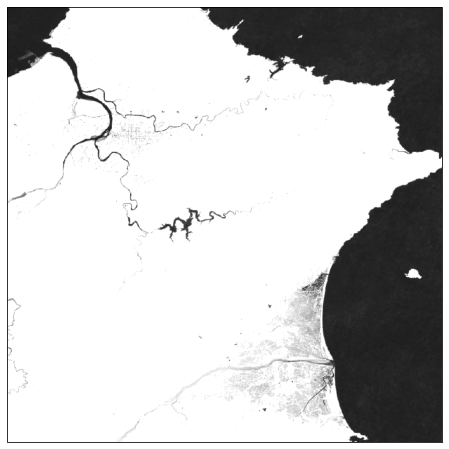

In [5]:

w = 0.32
h = 0.32

region = [lon - w, lat - h, lon + w, lat + h]

fig = plt.figure(figsize=(10, 8))

# use cartoee to get a map
ax = cartoee.get_map(occurrence, region=region, vis_params=VIS_WATER_MASK)

# add gridlines to the map at a specified interval
#cartoee.add_gridlines(ax, interval=[0.2, 0.2], linestyle=":")

# add north arrow
north_arrow_dict = {
    "text": "N",
    "xy": (0.1, 0.3),
    "arrow_length": 0.15,
    "text_color": "white",
    "arrow_color": "white",
    "fontsize": 20,
    "width": 5,
    "headwidth": 15,
    "ha": "center",
    "va": "center",
}
#cartoee.add_north_arrow(ax, **north_arrow_dict)

# add scale bar
scale_bar_dict = {
    "length": 10,
    "xy": (0.1, 0.05),
    "linewidth": 3,
    "fontsize": 20,
    "color": "white",
    "unit": "km",
    "ha": "center",
    "va": "bottom",
}
#cartoee.add_scale_bar_lite(ax, **scale_bar_dict)

#ax.set_title(label='Las Vegas, NV', fontsize=15)

plt.show()